In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_klines(df= None, close = None, low = None, high = None, open = None, ax = None, label = None):
    if df is not None:
        try:
            high = df['high']
            low = df['low']
            close = df['close']
            open = df['open']
            date = df.index
        except KeyError:
            raise ValueError("Dataframe must have 'high', 'low', 'close', 'open' columns.")
    else:
        if high is None or low is None or close is None or open is None:
            raise ValueError("Provide either a dataframe or all of high, low, close, and open data.")

    d = pd.Series(date).diff().dropna()
    step = d.median() if len(d) else pd.Timedelta(minutes=1)
    width = step * 0.8  # 80% of the candle spacing
    height = close - open
    bottom = np.where(height > 0, open, close + abs(height))
    color = np.where(height > 0, 'green', 'red')
    if ax is None :
        plt.bar(date, height, bottom=bottom, color=color,edgecolor = color, align='center', width=width, label=label)
        plt.vlines(date, ymin=low, ymax=high, color=color, linewidth=1)
    else :
        ax.bar(date, height, bottom=bottom, color=color, align='center', width=width, label=label)
        ax.vlines(date, ymin=low, ymax=high, color=color, linewidth=1)

In [21]:
bin = pd.read_parquet('usde_minute_binance.parquet')
uni = pd.read_parquet('uniswap_usde.parquet')
uni = uni[["timestamp", "token1Price"]].set_index("timestamp")
uni.token1Price = uni.token1Price.astype(float)

In [23]:
dfw = bin.iloc[center - window : center + window]

In [24]:
uni

,token1Price
timestamp,
1760112011,1.000130
1760112023,1.000130
1760112035,1.000130
1760112047,1.000130
1760112059,1.000130
...,...
1760147963,0.998542
1760147975,0.998239
1760147987,0.998239


In [30]:
uni.index = pd.to_datetime(uni.index, unit='s')

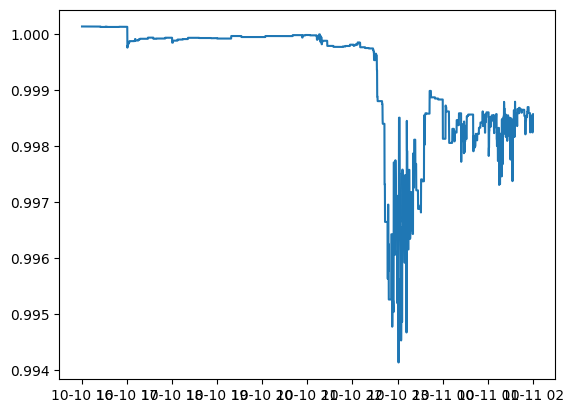

In [42]:
dfw

,open,high,low,close,volume
2025-10-10 18:50:00,1.0000,1.0000,1.0000,1.0000,0.0
2025-10-10 18:51:00,1.0000,1.0001,1.0000,1.0001,284520.0
2025-10-10 18:52:00,1.0001,1.0001,1.0001,1.0001,0.0
2025-10-10 18:53:00,1.0001,1.0001,1.0001,1.0001,0.0
2025-10-10 18:54:00,1.0001,1.0001,1.0001,1.0001,0.0
...,...,...,...,...,...
2025-10-11 01:25:00,0.9966,0.9970,0.9965,0.9969,3342858.0
2025-10-11 01:26:00,0.9969,0.9973,0.9968,0.9970,6418474.0
2025-10-11 01:27:00,0.9970,0.9970,0.9967,0.9967,3428429.0
2025-10-11 01:28:00,0.9967,0.9969,0.9966,0.9966,6558732.0


,token1Price
timestamp,
2025-10-10 16:00:11,1.000130
2025-10-10 16:00:23,1.000130
2025-10-10 16:00:35,1.000130
2025-10-10 16:00:47,1.000130
2025-10-10 16:00:59,1.000130
...,...
2025-10-11 01:28:11,0.998382
2025-10-11 01:28:23,0.998382
2025-10-11 01:28:35,0.998382


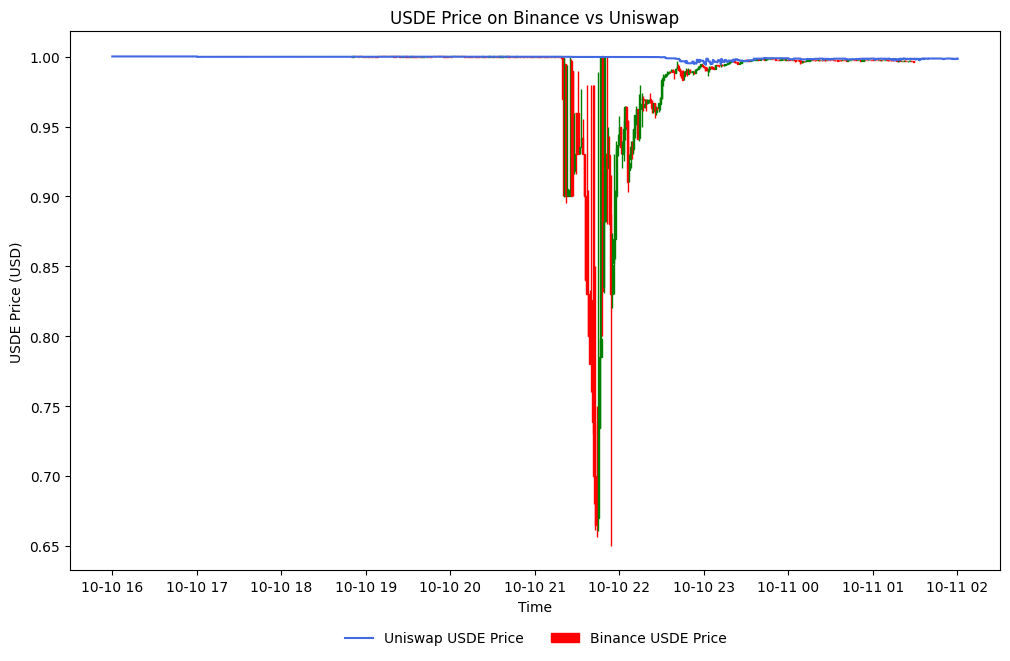

In [ ]:
center = 45250
window = 200

for k in range(2,400, step = 4):
    dfw = bin.iloc[center - window : center - window + k]
    plt.figure(figsize=(12,7))
    plot_klines(df=dfw, label='Binance USDE Price')
    plt.plot(uni[uni.index < dfw.index[-1]], color='royalblue', label='Uniswap USDE Price')
    plt.xlabel('Time')
    plt.ylabel('USDE Price (USD)')
    plt.legend(bbox_to_anchor=(0.72, -0.09), frameon = False, ncols = 2)

In [ ]:
import io
from PIL import Image
import matplotlib.dates as mdates

In [ ]:
plot_klines(df=bin)

KeyboardInterrupt: 